In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
# define schalar
D_mass      = 1.00e+0
rho         = 1.00e+0
u           = 1.00e+0

# define grid scale
total_length = 1.00e+0
num_grid     = 101
dx           = total_length/(num_grid-1)

# define time scale
start_time      = 0.00e+0
end_time        = 1.00e+0
dt              = 1.00e-3

# define boundary value
phi_0 = 1.00e+0
phi_L = 0.00e+0

In [3]:
# set grid posisions
x = []
for i in range(num_grid):
    x.append(i*dx)

# Analytical solution

In [4]:
# calculate analytical solution
PN = rho*u*total_length/D_mass # Peclet number

phi_ana = [] 
for i in range(num_grid):
    phi_temp = (math.exp(PN*x[i]/total_length) - 1) \
                *(phi_L - phi_0)/(math.exp(PN) - 1) + phi_0
    phi_ana.append(phi_temp)

Peclet number: 1.0


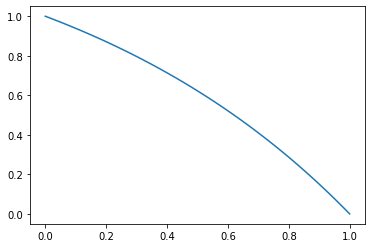

In [5]:
plt.plot(x, phi_ana)
print(f'Peclet number: {PN}')

# Define TDAM function

In [6]:
def calc_tdma(phi, calc_coef):
    P = []
    Q = []

    # step 1: calculate P[0] and Q[0]
    a_0, b_0, c_0, d_0 = calc_coef(0)
    P.append(b_0/a_0)
    Q.append(d_0/a_0)

    # step 2: calculate P[i] and Q[i]
    for i in range(1,num_grid):
        # call coefficent calculation
        a_i, b_i, c_i, d_i = calc_coef(i)
    
        P_temp = b_i/(a_i - c_i*P[i-1])
        Q_temp = (d_i + c_i*Q[i-1])/(a_i - c_i*P[i-1])
        P.append(P_temp)
        Q.append(Q_temp)

    # step 3: substitute Q[N] to phi[N]
    phi[num_grid-1] = Q[num_grid-1]

    # step 4: calcrate phi[i]
    for i in reversed(range(num_grid-1)):
        phi[i] = P[i]*phi[i+1] + Q[i]

# Numerical solution at Steady state

In [12]:
# Calclate coefficient of discretized equation
def calc_coef_steady(i):
    
    # center boundary
    if i == 0:
        a_i = 1.00e+0
        b_i = 0.00e+0
        c_i = 0.00e+0
        d_i = 1.00e+0
        
    # outer boundary
    elif i == num_grid-1:
        a_i = 1.00e+0
        b_i = 0.00e+0
        c_i = 0.00e+0
        d_i = 0.00e+0
    
    # internal grids
    else:
        dx_e = x[i+1] - x[i]
        dx_w = x[i] - x[i-1]
    
        F = rho*u
        D_e = D_mass/dx_e
        D_w = D_mass/dx_w
    
        a_E = D_e + max(-F, 0)
        a_W = D_w + max(F, 0)
        a_P = a_E + a_W
        b   = 0
    
        a_i = a_P
        b_i = a_E
        c_i = a_W
        d_i = b
    
    return a_i, b_i, c_i, d_i

In [13]:
# initialize phi
phi_sim = []
for i in range(num_grid):
    if i < num_grid*0.2:
        phi_sim.append(1.00e+0)
    else:
        phi_sim.append(0.00e+0)

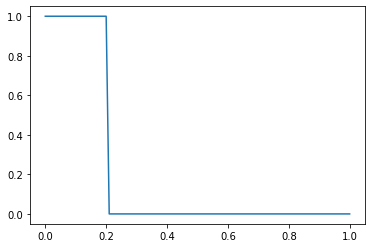

In [14]:
plt.plot(x, phi_sim)

In [15]:
calc_tdma(phi_sim, calc_coef_steady)

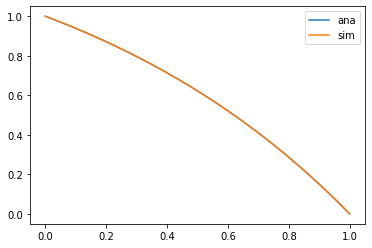

In [16]:
plt.plot(x, phi_ana, label='ana')
plt.plot(x, phi_sim,  label='sim')
plt.legend()

# Numerical solution at time evolution

In [18]:
# Calclate coefficient of discretized equation
def calc_coef_implicit(i):
    
    # center boundary
    if i == 0:
        a_i = 1.00e+0
        b_i = 1.00e+0
        c_i = 0.00e+0
        d_i = 0.00e+0
        
    # outer boundary
    elif i == num_grid-1:
        a_i = 1.00e+0
        b_i = 0.00e+0
        c_i = 1.00e+0
        d_i = 0.00e+0
    
    # internal grids
    else:
        dx_e = x[i+1] - x[i]
        dx_w = x[i] - x[i-1]
    
        F = rho*u
        D_e = D_mass/dx_e
        D_w = D_mass/dx_w
    
        a_E   = D_e + max(-F, 0)
        a_W   = D_w + max(F, 0)
        a_P_0 = rho*dx/dt
        a_P   = a_E + a_W + a_P_0
        b     = a_P_0*phi_sim[i]
    
        a_i = a_P
        b_i = a_E
        c_i = a_W
        d_i = b
    
    return a_i, b_i, c_i, d_i

In [19]:
# initialize phi
phi_sim = []
for i in range(num_grid):
    if i < num_grid*0.2:
        phi_sim.append(1.00e+0)
    else:
        phi_sim.append(0.00e+0)

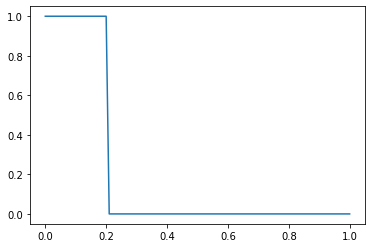

In [20]:
plt.plot(x, phi_sim)

In [21]:
calc_tdma(phi_sim, calc_coef_implicit)

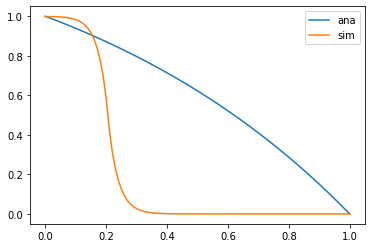

In [22]:
plt.plot(x, phi_ana, label='ana')
plt.plot(x, phi_sim,  label='sim')
plt.legend()

<IPython.core.display.Javascript object>


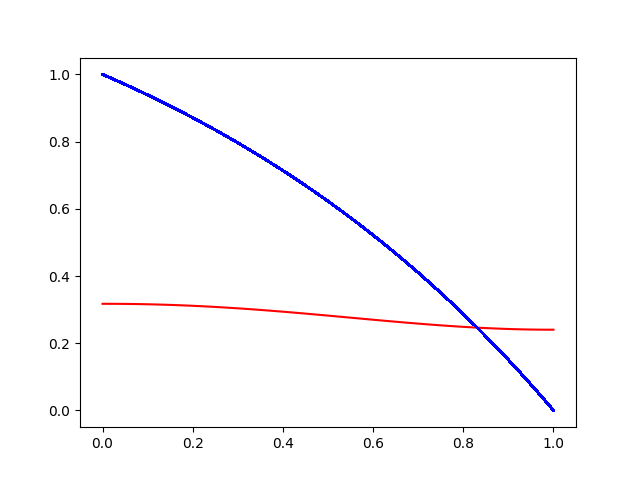

In [23]:
%matplotlib nbagg

import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

ims = []    
time = start_time
while time < end_time:
    calc_tdma(phi_sim, calc_coef_implicit)
    plt.plot(x, phi_ana, 'b', label='ana')
    im = plt.plot(x, phi_sim, 'r', label='sim',)
    ims.append(im)
    
    time += dt

ani = animation.ArtistAnimation(fig, ims)
plt.show()